In [2]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Входные данные

Тип входного уравнения:
1. Простой итерационный метод
2. Метод Зайделя
3. Простой итерационный метод в смягченном виде

In [5]:
k = int(input())
if k == 1:
    equation_type = 'simpleIterationMethod'
elif k == 2:
    equation_type = 'seidelMethod'
else:
    equation_type = 'simpleIterationMethodRelaxed'
print(f'Выбран: {equation_type}')

Выбран: simpleIterationMethodRelaxed


Ввод nx - количество x > 0 (рекомендуется: 40)

In [6]:
nx = int(input())

Ввод ny - число y > 0 (рекомендуется: 40)

In [7]:
ny = int(input())

Вариант 7:
\begin{align}
    \frac {\partial^2{u}} {\partial{x^2}} + \frac {\partial^2{u}} {\partial{y^2}} = -2u, \\
U(0, y) = cos(y), \\
U(\frac {\pi} {2}, y) = 0, \\
U(x, 0) = cos(x), \\
U(x, \frac {\pi} {2}) = 0
\end{align}

Аналитическое решение:
\begin{align}
U(x, y) = cos(x) \cdot cos(y)
\end{align}

In [8]:
params = {
    'a': 0,
    'b': 0,
    'c': 2,
    'd': 1,
    'lx': np.pi / 2,
    'ly': np.pi / 2,
    'w': 1.5,
    'f': lambda x, y: 0,
    'alpha1': 0,
    'alpha2': 1,
    'beta1': 0,
    'beta2': 1,
    'gamma1': 0,
    'gamma2': 1,
    'delta1': 0,
    'delta2': 1,
    'phi1': lambda y: np.cos(y),
    'phi2': lambda y: 0,
    'phi3': lambda x: np.cos(x),
    'phi4': lambda x: 0,
    'solution': lambda x, y: np.cos(x) * np.cos(y),
}

In [9]:
solver = ElepticalSolver(params, equation_type)

In [10]:
solved = solver.solve(nx, ny)
ans = {
    'numerical': solved[0],
    'iterations': solved[1],
    'analytic': solver.analyticSolve(nx, ny)
}

In [11]:
print('Выполнено на итерации:',ans['iterations'])

Выполнено на итерации: 553


In [12]:
def draw_u_x(dict_, nx, ny, time, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2 + np.pi / 2 / nx, np.pi / 2 / nx)
    y = np.arange(0, np.pi / 2 + np.pi / 2 / ny, np.pi / 2 / ny)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    

    plt.title('U from x')
    plt.plot(x, z1[time], color='r', label='numerical')
    plt.plot(x, z2[time], color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    for i in range(len(z1)):
        err.append(compareError(z1[i], z2[i]))
    plt.title('Error from y')
    plt.plot(y, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

Проверка времени

In [17]:
print(f'Введите время от 0 до {nx - 1}')
curr_time = int(input())

Введите время от 0 до 39


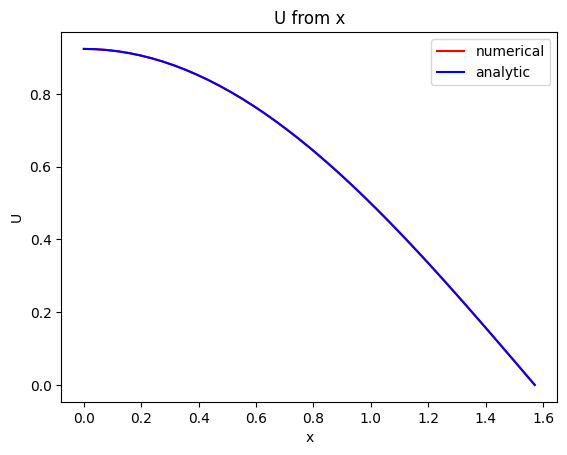

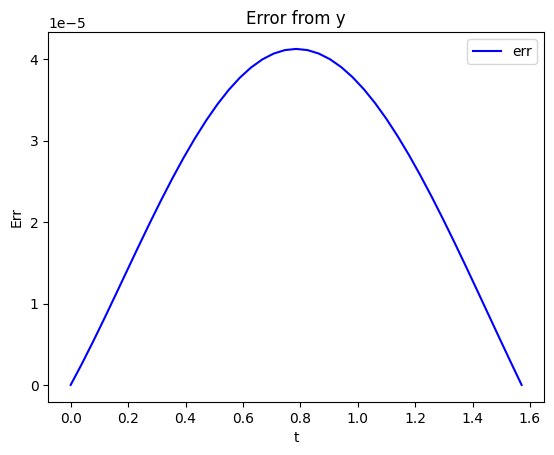

In [18]:
draw_u_x(ans, nx, ny, curr_time)